# Editing (cropping) the images data

This code is to solve the issue of images generated in `images_processing.ipynb`, that have the coordinates along the axes AND are of rectangular shape.
We want only the square really.

In [1]:
import cv2

In [2]:
import os
os.getcwd()

'/Users/azanchetta/Library/CloudStorage/OneDrive-TheAlanTuringInstitute/Research/projects/Maptcha/maptcha_dev/notebooks'

In [4]:

image = cv2.imread('../../data/images/FN/FN_m51_0121.png')

In [ ]:
cv2.imshow('nice',image)
cv2.waitKey(0) # this command opens a side window that NEVER closes

alternative to show image

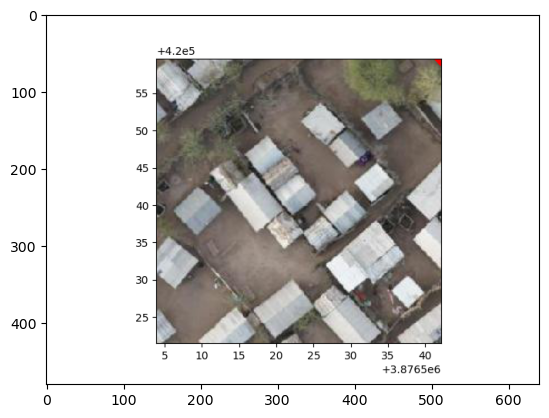

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('../../data/images/FN/FN_m51_0121.png')
imgplot = plt.imshow(img)
plt.show()

### Cropping

First trial using `opencv`

In [ ]:
# image coordinates of the actual image (the square we want), obtained from GIMP

y=144
x=59
h=370
w=370
crop_image = image[x:w, y:h]
cv2.imshow("Cropped", crop_image)
cv2.waitKey(0) # this command opens a side window that NEVER closes

Alternative method with `PIL`

In [7]:
from PIL import Image

image = Image.open(r'../../data/images/FN/FN_m51_0121.png')
image.show()

In [8]:
# coordinates with which to crop the image, obtained from GIMP
left = 144
top = 59
right = 513
bottom = 427

img_res = image.crop((left, top, right, bottom)) 


img_res.show()


In [9]:
img_res.save("../../data/images_edited/imagetry.png")

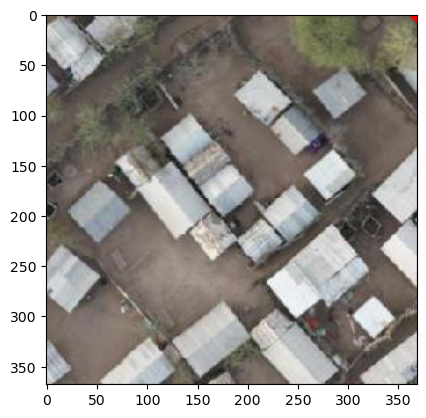

In [14]:
imgcropped = mpimg.imread('../../data/images_edited/imagetry.png')
imgplot = plt.imshow(imgcropped)
plt.show()

doing the same for all the images in folder

In [10]:
import glob

In [11]:
images_input_path = glob.glob('../../data/images/*/*')
# NOTE: make sure you have created the output folder (`images_edited`)
# and the internal folders too (TP, TN etc) before you run the following cell

In [12]:
for i in images_input_path:
    # print(f'input {i}')
    # upload the image
    image = Image.open(i)
    # crop the image by the coordinates defined before
    img_res = image.crop((left, top, right, bottom)) 
    # define output filename
    out = i.replace('data/images', 'data/images_edited')
    # print(f'output {out}')
    # save cropped image
    img_res.save(out, 'PNG')